In [1]:
import lib as l

In [2]:
l.EMB.create_model("France", "telephone")
l.EMB.create_model("USA", "telephone")
#l.EMB.create_model("USA", "iron")
#l.EMB.create_model("Spain", "iron")

Loaded data from France, took 12.162 seconds
Dataset has size (68499, 3) and columns ['date' 'article' 'lemmas']
Loaded data from USA, took 8.891 seconds
Dataset has size (18265, 3) and columns ['date' 'article' 'lemmas']


In [48]:
embeddings_fr, id2word_fr, word2id_fr = l.EMB.load_vec("./vectors/telephone/vectors-fr-en.txt")
embeddings_en, id2word_en, word2id_en = l.EMB.load_vec("./vectors/telephone/vectors-en-fr.txt")

In [50]:
embeddings_fr

array([[-0.51631,  0.61227, -0.39943, ..., -0.5223 , -0.35672, -0.61557],
       [-0.44187,  0.83115, -0.38415, ..., -1.15389,  0.34905, -0.10651],
       [-0.8463 ,  0.03803,  0.30395, ...,  0.23032,  0.08045, -0.33832],
       ...,
       [ 0.27037, -0.51497,  0.02494, ...,  0.0289 , -0.10718, -0.05335],
       [-0.15971, -0.62245,  0.1051 , ..., -0.13852, -0.39795,  0.07892],
       [ 0.35286,  0.97033,  0.03312, ...,  0.16982,  0.20005, -0.99893]])

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(l.np.vstack([embeddings_fr, embeddings_en]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 644.54


In [69]:
import matplotlib.pyplot as plt
from random import random
def plot_similar_word(topics_df, src_word2id, src_emb, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    word_marker = []
    word_color = []

    for topic in topics_df.iterrows():
       #color = (random(), random(), random())
       for w in l.U.to_list(topic[1]):
         try:
            if topic[1]["lang"] == "eng":
              Y.append(tgt_emb[tgt_word2id[w]])
              word_marker.append("x")
              word_color.append((0,0,1))
            else:
              Y.append(src_emb[src_word2id[w]])
              word_marker.append("o")
              word_color.append((1,0,0))
            word_labels.append(w)
            #word_color.append(color)
         except: 
            pass

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(15, 15), dpi=80)

    plt.scatter(Y[:word_marker.count('x'), 0], Y[:word_marker.count('x'), 1], marker='x')
    plt.scatter(Y[word_marker.count('o'):, 0], Y[word_marker.count('o'):, 1], marker='o')

    for k, (label, color, x, y) in enumerate(zip(word_labels, word_color, x_coords, y_coords)):
        #color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color)

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')
    plt.savefig('viz.png')
    plt.show()

In [60]:
topics_df = l.pd.read_csv("topics.csv")

In [67]:
time_period_df = topics_df[((topics_df["lang"]=="fr") & (topics_df["timespan"]==1870)) | ((topics_df["lang"]=="eng") & (topics_df["timespan"]==1870))]
topics_viz = time_period_df[time_period_df["id"]=="fr_telephone_1870_11"] #politics
topics_viz = topics_viz.append(time_period_df[time_period_df["id"]=="eng_telephone_1870_7"]) #politics
topics_viz = topics_viz.append(time_period_df[time_period_df["id"]=="fr_telephone_1870_2"]) #sales
topics_viz = topics_viz.append(time_period_df[time_period_df["id"]=="eng_telephone_1870_0"]) #sales

<ipython-input-67-4d04b42ff24e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_viz = topics_viz.append(time_period_df[time_period_df["id"]=="eng_telephone_1870_7"]) #politics
<ipython-input-67-4d04b42ff24e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_viz = topics_viz.append(time_period_df[time_period_df["id"]=="fr_telephone_1870_2"]) #sales
<ipython-input-67-4d04b42ff24e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_viz = topics_viz.append(time_period_df[time_period_df["id"]=="eng_telephone_1870_0"]) #sales


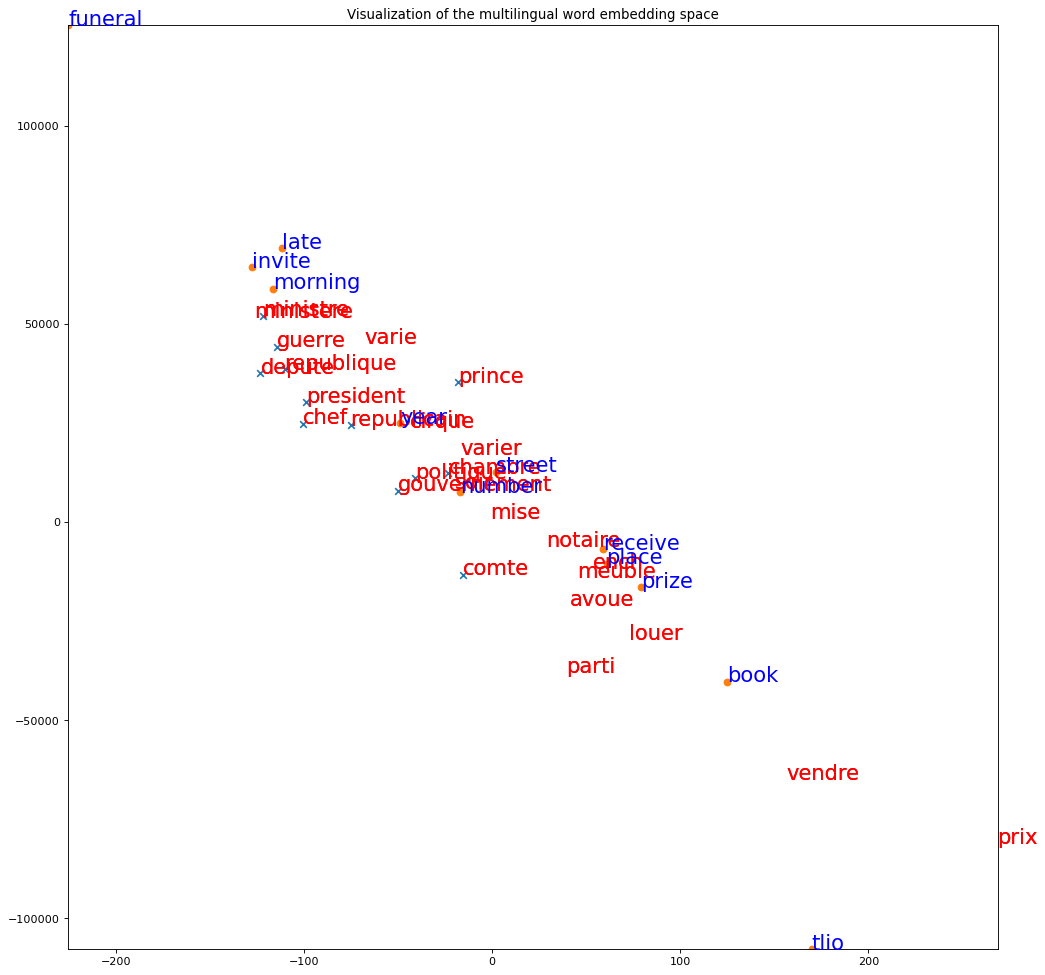

In [70]:
plot_similar_word(topics_viz, word2id_fr, embeddings_fr, word2id_en, embeddings_en, pca)